## Model

Imports

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from numpy import random
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

Here we read the data and drop any NaN's and infinite numbers

In [21]:
sub = pd.read_csv('/data/apjacobson/subset.csv')
sub = pd.concat([sub, pd.get_dummies(sub[['college']])], axis=1, join='inner')
sub[sub == np.inf] = np.nan
sub = sub.dropna()

Here we calculate the R^2, root mean squared error, and all the parameter estimates

In [22]:
X = sub[['evals', 'avg grade num', 'proportion major', 'proportion support', 'proportion gen ed', 'average year', 'college_CENG', 'college_CLA', 'college_COSAM', 'college_OCOB', 'college_CAFES']]
y = sub[['rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R^2: {}".format(model.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
params = pd.Series(model.coef_[0], index=X.columns)
params

R^2: 0.1749046653605888
Root Mean Squared Error: 0.800893466736901


evals                 0.002225
avg grade num         0.075050
proportion major      0.034877
proportion support   -0.145003
proportion gen ed     0.044655
average year         -0.029938
college_CENG         -0.183895
college_CLA           0.113745
college_COSAM         0.148609
college_OCOB         -0.016446
college_CAFES         0.215777
dtype: float64

We can note the biggest influencers on rating:
* Professors who teach primarily support classes get lower poly ratings
* Being a professor in College of Engineering or Buisnees has a negative association with rating
* Being in CAFES or COSAM have the biggest positive association with polyrating
* These are when using College of Architecture as a baseline group

In [23]:
from sklearn.cross_validation import cross_val_score
c = cross_val_score(model, X, y, cv=5)
print(c.mean())
print(np.std(c))

0.1678126144394317
0.06057294790816143


As we can see from the cross validation, the model isn't a great fit to the ratings data

In [40]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

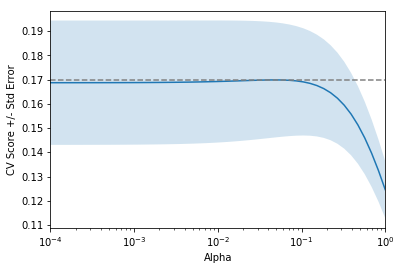

In [42]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []
ridge = Ridge(normalize=True)
for alpha in alpha_space:
    ridge.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))
display_plot(ridge_scores, ridge_scores_std);

As we can see, the R^2 is around 0.17.